In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from typing import List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import SVG

import landscape as ld
import networkx as nx
import stp_parser as stp
from networkx.algorithms import approximation as apx
from sklearn.cluster import KMeans
from sknetwork.hierarchy import Paris, cut_balanced, cut_straight
from sknetwork.visualization import svg_dendrogram, svg_graph

In [3]:
%matplotlib inline

In [4]:
PROJECT_PATH = Path.cwd().resolve()
DATA_PATH = PROJECT_PATH / "data/"

# parser

## load file

In [5]:
ES10FSR01_FILE = DATA_PATH / "raw" / "ES10FST" / "es10fst01.stp"

In [6]:
s = stp.SteinerTreeProblem(stp_file=ES10FSR01_FILE,
                           update_factors=[0.0, 1.0],
                           default_prize=2.0,
                           graph_period_attributes={"total_weight": [40.0, 40.0], 
                                                    "total_distance": [40.0, 40.0]}
                          )

In [7]:
s.num_periods()

2

## get node, edges and graph attributes

In [12]:
s.graph

{'periods': 2,
 'update_factor-01': 0.0,
 'update_factor-02': 1.0,
 'total_weight-01': 40.0,
 'total_weight-02': 40.0,
 'total_distance-01': 40.0,
 'total_distance-02': 40.0}

In [10]:
s.node_attributes_df()

,prize,is_terminal,x,y
node,,,,
1,2.0,2,8183892,4929768
2,2.0,1,4060003,6464021
3,2.0,1,6673119,3007983
4,2.0,1,3283856,4356078
5,2.0,1,7079213,7496262
6,2.0,1,3988946,9371529
7,2.0,1,1729512,135599
8,2.0,1,4489141,562685
9,2.0,1,7066958,1568812


In [11]:
s.edge_attributes_df()

distance   weight
source target                   
1      16       1340771  1340771
2      18       2783118  2783118
       17         71057    71057
       14       1534253  1534253
3      15       1921785  1921785
       12       1439171  1439171
4      13        573690   573690
       11       3793393  3793393
5      18       1268333  1268333
6      17       2907508  2907508
7      11       1981430  1981430
8      12       3190105  3190105
       11       1205285  1205285
9      12        393839   393839
10     18       1072719  1072719
       16        461534   461534
13     14        776147   776147
       17       2239343  2239343
14     15       2613116  2613116
15     16        170002   170002

# writer

## write STP file

In [13]:
s.write_stp("test.stp")

In [14]:
t = stp.SteinerTreeProblem(stp_file="test.stp",
                           update_factors=[0.0, 1.0],
                           default_prize=2.0,
                           graph_period_attributes={"total_weight": [40.0, 40.0], 
                                                    "total_distance": [40.0, 40.0]}
                          )

In [15]:
!cat test.stp

0 STP File, STP Format Version 1.0

SECTION Graph
Nodes 18
Edges 20
E 1 16 1340771
E 2 18 2783118
E 2 17 71057
E 2 14 1534253
E 3 15 1921785
E 3 12 1439171
E 4 13 573690
E 4 11 3793393
E 5 18 1268333
E 6 17 2907508
E 7 11 1981430
E 8 12 3190105
E 8 11 1205285
E 9 12 393839
E 10 18 1072719
E 10 16 461534
E 13 14 776147
E 13 17 2239343
E 14 15 2613116
E 15 16 170002
END

SECTION Terminals
Terminals 10
T 1
T 2
T 3
T 4
T 5
T 6
T 7
T 8
T 9
T 10
END

SECTION Coordinates
DD 1 8183892 4929768
DD 2 4060003 6464021
DD 3 6673119 3007983
DD 4 3283856 4356078
DD 5 7079213 7496262
DD 6 3988946 9371529
DD 7 1729512 135599
DD 8 4489141 562685
DD 9 7066958 1568812
DD 10 6843121 5391302
DD 11 3283856 562685
DD 12 6673119 1568812
DD 13 3283856 4929768
DD 14 4060003 4929768
DD 15 6673119 4929768
DD 16 6843121 4929768
DD 17 3988946 6464021
DD 18 6843121 6464021
END

EOF


In [16]:
!rm test.stp

## write graphml file

In [17]:
s.write_graphml("test.graphml")

In [18]:
!cat test.graphml

<?xml version='1.0' encoding='utf-8'?>
<graphml xmlns="http://graphml.graphdrawing.org/xmlns" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd"><key id="d12" for="edge" attr.name="distance" attr.type="int"/>
<key id="d11" for="edge" attr.name="weight" attr.type="int"/>
<key id="d10" for="node" attr.name="y" attr.type="int"/>
<key id="d9" for="node" attr.name="x" attr.type="int"/>
<key id="d8" for="node" attr.name="is_terminal" attr.type="int"/>
<key id="d7" for="node" attr.name="prize" attr.type="double"/>
<key id="d6" for="graph" attr.name="total_distance-02" attr.type="double"/>
<key id="d5" for="graph" attr.name="total_distance-01" attr.type="double"/>
<key id="d4" for="graph" attr.name="total_weight-02" attr.type="double"/>
<key id="d3" for="graph" attr.name="total_weight-01" attr.type="double"/>
<key id="d2" for="graph" attr.name="update_factor-02" attr.type="double

In [19]:
!rm test.graphml

# Generate Instances

In [20]:
temp_graph = stp.SteinerTreeProblem(stp_file=ES10FSR01_FILE)

In [21]:
def average_degree(G: nx.Graph) -> float:
    return sum(deg for node_id, deg in G.degree())/float(len(G))

In [22]:
def update_factors_generator(discount_factor: float=1.0, periods=1) -> List[float]:
    assert 0 < discount_factor < 1.0
    return [1/((1+discount_factor)**p) for p in range(1, periods+1)]

- discount_factor
- avg_degree_coef
- distance_limit_coef
- graph
- periods

In [23]:
PERIODS = 2
update_factors = [round(ufp, 2) for ufp in update_factors_generator(discount_factor=0.1, periods=PERIODS)]
budget_limit = round(average_degree(temp_graph), 2)
distance_limit = round(0.1 * nx.diameter(temp_graph), 2)

In [24]:
t = stp.SteinerTreeProblem(stp_file=ES10FSR01_FILE,
                           update_factors=update_factors,
                           root_node=3,
                           # default_prize=2.0,
                           graph_period_attributes={"total_budget_limit": [budget_limit] * PERIODS, 
                                                    "total_distance_limit": [distance_limit] * PERIODS
                                                   },
                           edge_period_attributes={"cost": 1}
                          )

In [25]:
t.graph

{'periods': 2,
 'update_factor-01': 0.91,
 'update_factor-02': 0.83,
 'total_budget_limit-01': 2.22,
 'total_budget_limit-02': 2.22,
 'total_distance_limit-01': 0.7,
 'total_distance_limit-02': 0.7}

In [26]:
t.node_attributes_df()

,prize,is_terminal,x,y
node,,,,
1,1,1,8183892,4929768
2,1,1,4060003,6464021
3,1,2,6673119,3007983
4,1,1,3283856,4356078
5,1,1,7079213,7496262
6,1,1,3988946,9371529
7,1,1,1729512,135599
8,1,1,4489141,562685
9,1,1,7066958,1568812


In [27]:
t.edge_attributes_df()

distance  cost-01   weight  cost-02
source target                                     
1      16       1340771        1  1340771        1
2      18       2783118        1  2783118        1
       17         71057        1    71057        1
       14       1534253        1  1534253        1
3      15       1921785        1  1921785        1
       12       1439171        1  1439171        1
4      13        573690        1   573690        1
       11       3793393        1  3793393        1
5      18       1268333        1  1268333        1
6      17       2907508        1  2907508        1
7      11       1981430        1  1981430        1
8      12       3190105        1  3190105        1
       11       1205285        1  1205285        1
9      12        393839        1   393839        1
10     18       1072719        1  1072719        1
       16        461534        1   461534        1
13     14        776147        1   776147        1
       17       2239343        1  2239343        1
14     15       2613116        1  2613116        1
15     16        170002        1   170002        1

In [28]:
!cat {ES10FSR01_FILE}

33d32945 STP File, STP Format Version 1.00
Section Comment
Name    "es10fst01"
Creator "Martin Zachariasen, David Warme"
Remark  "Reduced rectilinear graph from FST generator GeoSteiner"
End

Section Graph
Nodes 18
Edges 20
E 7 11 1981430
E 8 12 3190105
E 8 11 1205285
E 9 12 393839
E 3 15 1921785
E 3 12 1439171
E 4 13 573690
E 4 11 3793393
E 13 14 776147
E 13 17 2239343
E 14 15 2613116
E 15 16 170002
E 1 16 1340771
E 10 18 1072719
E 10 16 461534
E 2 18 2783118
E 2 17 71057
E 2 14 1534253
E 5 18 1268333
E 6 17 2907508
End

Section Terminals
Terminals 10
T 1
T 2
T 3
T 4
T 5
T 6
T 7
T 8
T 9
T 10
End

Section Coordinates
DD 1 8183892 4929768
DD 2 4060003 6464021
DD 3 6673119 3007983
DD 4 3283856 4356078
DD 5 7079213 7496262
DD 6 3988946 9371529
DD 7 1729512 135599
DD 8 4489141 562685
DD 9 7066958 1568812
DD 10 6843121 5391302
DD 11 3283856 562685
DD 12 6673119 1568812
DD 13 3283856 4929768
DD 14 4060003 4929768
DD 15 6673119 4929768
DD 16 6843121 4929768
DD 17 3988946 6464021
DD 18 6843121

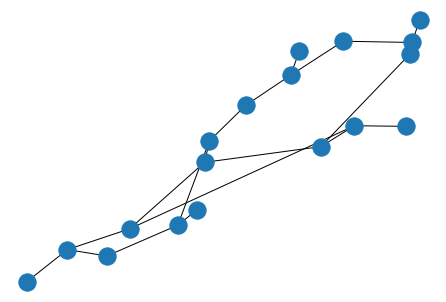

In [29]:
nx.draw(temp_graph, pos=nx.spring_layout(temp_graph))

# Batch instance generation

In [54]:
from pathlib import Path
from itertools import product

In [37]:
STP_FOLDER = "data/raw/ES10FST/"
GRAPHML_OUTPUT_FOLDER = "data/processed/ES10FST/"

In [38]:
output_path = Path(GRAPHML_OUTPUT_FOLDER)
output_path.mkdir(parents=True, exist_ok=True)

In [64]:
def dict_product(**kwargs):
    keys = kwargs.keys()
    values = kwargs.values()
    return (dict(zip(keys, x)) for x in product(*values))

In [100]:
def list_round(digits: int):
    """Decorator to round the values of a list."""
    def list_round_digits(fn):
        def wrapper_fn(*args, **kwargs):
            return [round(value, digits) for value in fn(*args, **kwargs)]

        return wrapper_fn
    return list_round_digits

In [32]:
def average_degree(G: nx.Graph) -> float:
    return sum(deg for node_id, deg in G.degree())/float(len(G))

In [96]:
@list_round(2)
def update_factors_generator(discount_factor: float=1.0, periods=1) -> List[float]:
    assert 0 <= discount_factor < 1.0
    return [1/((1+discount_factor)**p) for p in range(1, periods+1)]

In [108]:
@list_round(2)
def budget_limit_generator(graph: nx.Graph, periods: int, multiplier: float=1.0) -> List[float]:
    return [multiplier * average_degree(graph)] * periods

In [109]:
@list_round(2)
def distance_limit_generator(graph: nx.Graph, periods: int, multiplier: float=1.0) -> List[float]:
    return [multiplier * nx.diameter(graph)] * periods

In [125]:
for stp_file in Path(STP_FOLDER).glob("*.stp"):
    temp_graph = stp.SteinerTreeProblem(stp_file=stp_file)
    
    PERIODS = 2
    # update_factors = update_factors_generator(discount_factor=0.1, periods=PERIODS)
    # budget_limit = [average_degree(temp_graph)] * PERIODS
    # distance_limit = [0.1 * nx.diameter(temp_graph)] * PERIODS
    
    for index, config in enumerate(dict_product(update_factors=[update_factors_generator(discount_factor=0.1, periods=PERIODS),  
                                                                update_factors_generator(discount_factor=0.0, periods=PERIODS)], 
                               budget_limit=[budget_limit_generator(temp_graph, PERIODS, multiplier=0.5), 
                                             budget_limit_generator(temp_graph, PERIODS)], 
                               distance_limit=[distance_limit_generator(temp_graph, PERIODS, multiplier=0.1)],
                               cost=[1]
                              ), 1):
    
        t = stp.SteinerTreeProblem(stp_file=stp_file,
                                   update_factors=config["update_factors"],
                                   root_node=3,
                                   # default_prize=2.0,
                                   graph_period_attributes={"total_budget_limit": config["budget_limit"], 
                                                            "total_distance_limit": config["distance_limit"]
                                                           },
                                   edge_period_attributes={"cost": config["cost"]}
                                  )
        
        output_graphml_file = output_path / f"{stp_file.stem}-{index:02d}{stp_file.suffix}"
        print(output_graphml_file)
        print(config)
        t.write_graphml(output_graphml_file)

data/processed/ES10FST/es10fst14-01.stp
{'update_factors': [0.91, 0.83], 'budget_limit': [1.33, 1.33], 'distance_limit': [1.1, 1.1], 'cost': 1}
data/processed/ES10FST/es10fst14-02.stp
{'update_factors': [0.91, 0.83], 'budget_limit': [2.67, 2.67], 'distance_limit': [1.1, 1.1], 'cost': 1}
data/processed/ES10FST/es10fst14-03.stp
{'update_factors': [1.0, 1.0], 'budget_limit': [1.33, 1.33], 'distance_limit': [1.1, 1.1], 'cost': 1}
data/processed/ES10FST/es10fst14-04.stp
{'update_factors': [1.0, 1.0], 'budget_limit': [2.67, 2.67], 'distance_limit': [1.1, 1.1], 'cost': 1}
data/processed/ES10FST/es10fst11-01.stp
{'update_factors': [0.91, 0.83], 'budget_limit': [0.93, 0.93], 'distance_limit': [0.7, 0.7], 'cost': 1}
data/processed/ES10FST/es10fst11-02.stp
{'update_factors': [0.91, 0.83], 'budget_limit': [1.86, 1.86], 'distance_limit': [0.7, 0.7], 'cost': 1}
data/processed/ES10FST/es10fst11-03.stp
{'update_factors': [1.0, 1.0], 'budget_limit': [0.93, 0.93], 'distance_limit': [0.7, 0.7], 'cost': 1

## Load instance

In [114]:
g_gml = nx.read_graphml(output_path / "es10fst03-04.stp")

In [115]:
g_gml.graph

{'node_default': {},
 'edge_default': {},
 'periods': 2,
 'update_factor-01': 1.0,
 'update_factor-02': 1.0,
 'total_budget_limit-01': 2.35,
 'total_budget_limit-02': 2.35,
 'total_distance_limit-01': 0.7,
 'total_distance_limit-02': 0.7}

In [122]:
class GraphViewer():

    @staticmethod
    def node_attributes_df(graph: nx.Graph, index_name="node") -> pd.DataFrame:
        """Returns a pandas DataFrame where each row contains node attributes"""
        df = pd.DataFrame.from_dict(dict(graph.nodes(data=True)), orient='index')
        df.index.name = index_name
        return df
    
    @staticmethod
    def edge_attributes_df(graph: nx.Graph) -> pd.DataFrame:
        """Returns a pandas DataFrame where each row contains edge attributes"""
        return nx.to_pandas_edgelist(graph).set_index(["source", "target"])

In [123]:
GraphViewer.node_attributes_df(g_gml)

,prize,is_terminal,x,y
node,,,,
1,1,1,9819494,9247995
2,1,1,7895648,6555445
3,1,2,6774995,1526794
4,1,1,4818264,5863090
5,1,1,1042028,3883077
6,1,1,373098,7508847
7,1,1,9812760,1422699
8,1,1,7802728,2131439
9,1,1,7190162,1872961


In [124]:
GraphViewer.edge_attributes_df(g_gml)

distance  cost-01   weight  cost-02
source target                                     
1      2        4616396        1  4616396        1
2      17         92920        1    92920        1
3      11        346167        1   346167        1
4      16       2984464        1  2984464        1
       17       3676819        1  3676819        1
       15       3776236        1  3776236        1
       13       1980013        1  1980013        1
5      13       3776236        1  3776236        1
       15       1980013        1  1980013        1
       14       2648943        1  2648943        1
6      14       1645757        1  1645757        1
7      12       2460294        1  2460294        1
8      16       3731651        1  3731651        1
       12        258478        1   258478        1
9      12        612566        1   612566        1
       11        415167        1   415167        1
10     13       2244563        1  2244563        1
       11       1722284        1  1722284        1
14     15        668930        1   668930        1
16     17        692355        1   692355        1